In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import smogn
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")

dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

r_index: 100%|##########| 2/2 [00:00<00:00,  3.15it/s]


In [ ]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13504,Testing,O,13,Moderate,1,Mild,51,Severe,65,...,79.499832,22.753678,194.748627,19.694691,117.239493,81.089430,115.027831,5.442414,0.423058,5.581820
1,14078,Testing,O,9,Moderate,5,Mild,49,Severe,65,...,46.977220,29.151628,303.865132,29.471302,66.474897,341.265150,81.661680,2.420979,1.113503,2.875139
2,14066,Testing,O,10,Moderate,5,Mild,49,Severe,65,...,47.342770,139.118342,159.699750,123.714934,87.782503,73.371000,108.985313,0.586708,0.467870,0.936452
3,14439,Testing,O,14,Moderate,6,Mild,46,Severe,66,...,81.657057,100.120953,72.643565,84.554584,116.100577,53.178180,173.219269,1.088358,0.734774,1.951304
4,14455,Testing,O,15,Moderate,5,Mild,46,Severe,66,...,867.415902,246.986499,75.434276,476.840041,320.868431,17.866096,806.238976,1.322825,0.202747,1.692854
5,13268,Testing,O,10,Moderate,6,Mild,51,Severe,68,...,101.799197,92.364388,142.198436,96.052677,225.028841,25.493901,219.891059,2.347774,0.203122,2.297789
6,13352,Testing,O,14,Moderate,6,Mild,50,Severe,70,...,99.510872,129.645073,132.521126,126.534735,111.721788,110.916795,124.983599,0.871032,0.826611,0.992843
7,13336,Testing,O,14,Moderate,6,Mild,49,Severe,69,...,53.483335,286.619876,104.222060,131.959901,157.221848,75.987756,186.377152,0.539876,0.706646,1.359664
8,13538,Testing,O,13,Moderate,5,Mild,49,Severe,70,...,199.426229,81.087248,62.786541,161.370502,111.487055,23.304322,330.011226,1.394671,0.352171,2.035588
9,14142,Testing,O,12,Moderate,5,Mild,52,Severe,70,...,261.196321,225.978553,100.795151,257.029374,282.091130,36.323214,405.972625,1.237058,0.345714,1.625849


In [ ]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)



featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 20
              Specs      Score
776         TA-G-91  17.184770
777         TA-G-92  16.615022
778         TA-G-93  15.741697
775         TA-G-90  15.611028
779         TA-G-94  14.892610
784         TA-G-99  13.312794
785        TA-G-100  13.205724
774         TA-G-89  12.463413
780         TA-G-95  12.397433
783         TA-G-98  11.858989
781         TA-G-96  10.846157
782         TA-G-97  10.773867
773         TA-G-88   9.799442
772         TA-G-87   7.800027
791  Swing_CCI_TA-G   7.335898
685          TA-G-0   6.459248
771         TA-G-86   5.873590
686          TA-G-1   5.801438
687          TA-G-2   5.001664
770         TA-G-85   4.591623


In [ ]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [ ]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [ ]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

#Model Result Analyzing Functions

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns


def R2_Score(temp_y,temp_pred):
  return r2_score(temp_y,temp_pred)


def MS_error(temp_y,temp_pred):
  return mean_squared_error(temp_y, temp_pred)




def observe_plot(temp_y,temp_pred,width,height):
  plt.figure(figsize=(width,height))
  plt.scatter(temp_y, temp_pred, color = "blue")
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()


def pred_dataframe(temp_y,temp_pred):
  return pd.DataFrame(
        {
            "Actual Value":temp_y,
            "Predicted Value":temp_pred,
            "Difference":temp_y-temp_pred
        })




def reg_plot(pred_y_df,width,height):
  sns.set(rc={'figure.figsize':(width,height)})
  sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);





#Linear Regression

###Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

###Training Results

In [ ]:
y_pred_train = regr.predict(X_train)
print("R2 score of Training: ", R2_Score(y_train,y_pred_train))
print("Mean squared error: ",MS_error(y_train, y_pred_train))


R2 score of Training:  0.3657350174638948
Mean squared error:  288.3664160472524


In [ ]:
#observe_plot(y_train,y_pred_train,width=15,height=10)

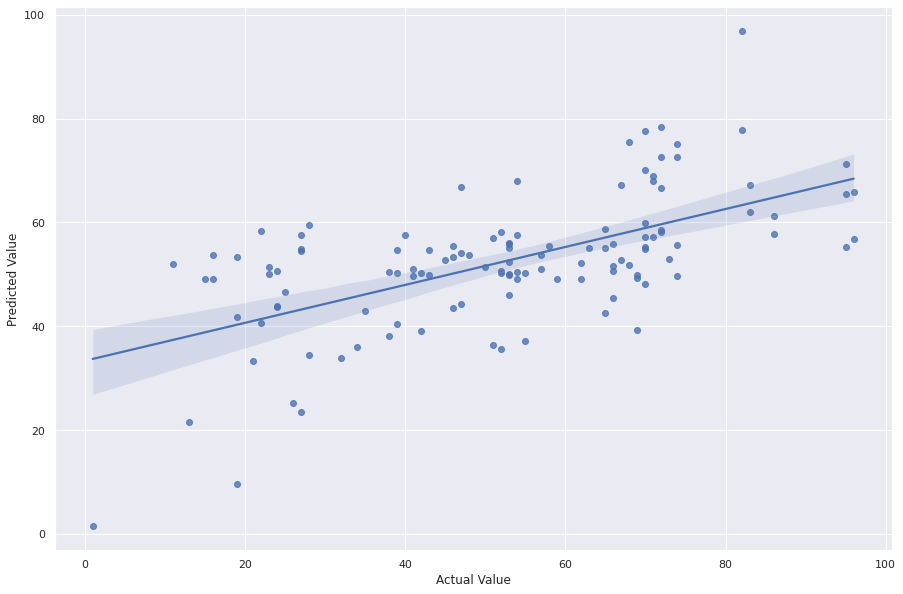

In [ ]:
pred_y_df = pred_dataframe(y_train,y_pred_train)
reg_plot(pred_y_df,width=15,height=10)



---



###Testing Results

In [ ]:
y_pred_test = regr.predict(X_test)
print("R2 score of Testing: ", R2_Score(y_test,y_pred_test))
print("Mean squared error: ",MS_error(y_test,y_pred_test))

R2 score of Testing:  -8.018127666332402
Mean squared error:  4631.5264409140045


In [ ]:
#observe_plot(y_test,y_pred_test,width=15,height=10)

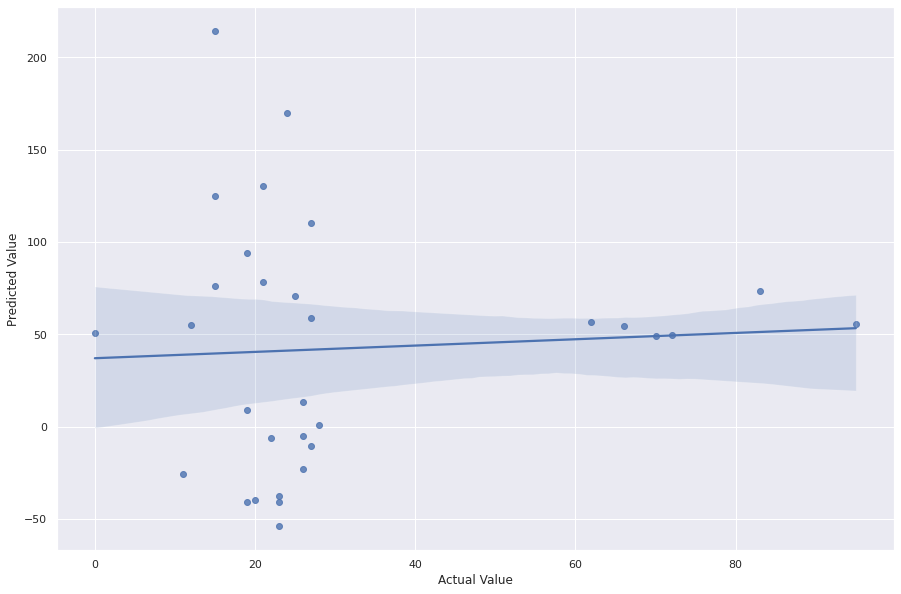

In [ ]:
pred_y_df = pred_dataframe(y_test,y_pred_test)
reg_plot(pred_y_df,width=15,height=10)



---



###All Data

In [ ]:
y_pred_all = regr.predict(X_new)
print("R2 score of Testing: ", R2_Score(y_new,y_pred_all))
print("Mean squared error: ",MS_error(y_new,y_pred_all))

R2 score of Testing:  -1.1757530061601678
Mean squared error:  1180.0085403576452


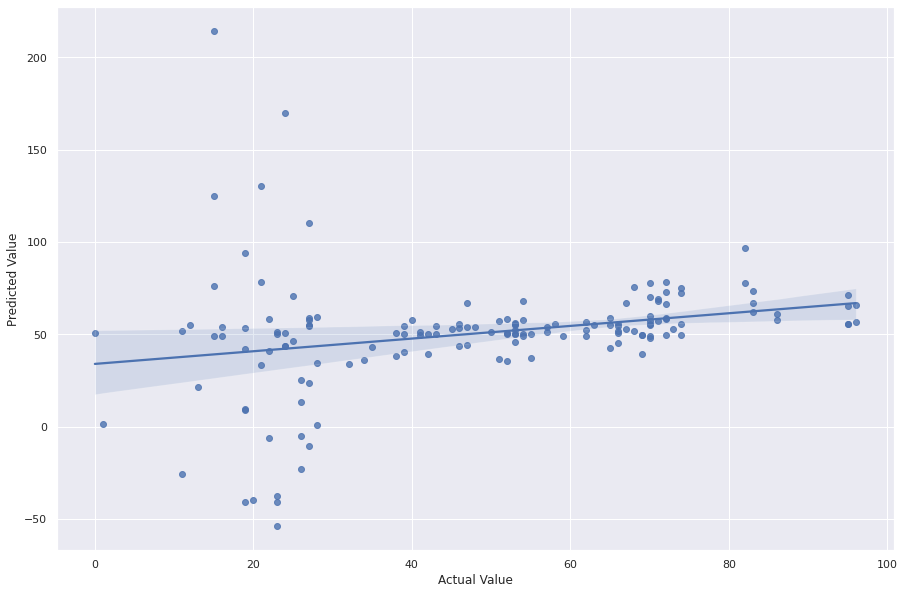

In [ ]:
pred_y_df = pred_dataframe(y_new,y_pred_all)
reg_plot(pred_y_df,width=15,height=10)

#Support Vector Regression (SVR) using linear and non-linear kernels

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)